<a href="https://colab.research.google.com/github/soyebganja/DL-Practice-Projects/blob/main/9%3AModel%20Optimization%3A%20Regularization%20Techniques/9_2_Dropout_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('sonar.all-data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.shape

(208, 61)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
df[60].value_counts()

,count
60,
M,111
R,97


In [ ]:
df[60] = df[60].map({'M': 0, 'R': 1})
df.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
201,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.266,...,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031,0
63,0.0067,0.0096,0.0024,0.0058,0.0197,0.0618,0.0432,0.0951,0.0836,0.118,...,0.0048,0.0023,0.0020,0.0040,0.0019,0.0034,0.0034,0.0051,0.0031,1


In [ ]:
X = df.drop(60, axis=1)
y = df[60]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train.shape

(156, 60)

In [ ]:
y_train.values

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1])

In [ ]:
# Convert the split array to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
# Create Tensor Datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    val_losses = []
    val_accuracies = []
    # model.train()
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # validation phase
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(all_labels, all_preds)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return train_losses, val_losses, val_accuracies

Epoch 1/20, Train Loss: 0.6943, Val Loss: 0.6655, Val Accuracy: 0.5192
Epoch 2/20, Train Loss: 0.6787, Val Loss: 0.6551, Val Accuracy: 0.5192
Epoch 3/20, Train Loss: 0.6677, Val Loss: 0.6427, Val Accuracy: 0.5385
Epoch 4/20, Train Loss: 0.6549, Val Loss: 0.6211, Val Accuracy: 0.5962
Epoch 5/20, Train Loss: 0.6359, Val Loss: 0.6079, Val Accuracy: 0.7115
Epoch 6/20, Train Loss: 0.6219, Val Loss: 0.5845, Val Accuracy: 0.7308
Epoch 7/20, Train Loss: 0.5847, Val Loss: 0.5640, Val Accuracy: 0.7115
Epoch 8/20, Train Loss: 0.5516, Val Loss: 0.5320, Val Accuracy: 0.7115
Epoch 9/20, Train Loss: 0.5099, Val Loss: 0.5182, Val Accuracy: 0.7500
Epoch 10/20, Train Loss: 0.4757, Val Loss: 0.4918, Val Accuracy: 0.7308
Epoch 11/20, Train Loss: 0.4500, Val Loss: 0.5423, Val Accuracy: 0.7500
Epoch 12/20, Train Loss: 0.4188, Val Loss: 0.4780, Val Accuracy: 0.7308
Epoch 13/20, Train Loss: 0.4043, Val Loss: 0.4703, Val Accuracy: 0.7115
Epoch 14/20, Train Loss: 0.3935, Val Loss: 0.5519, Val Accuracy: 0.7500
E

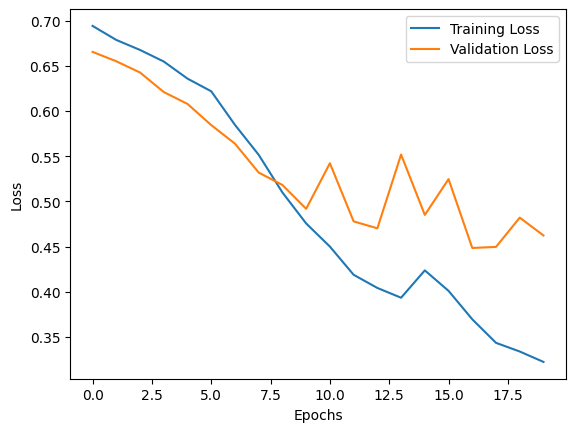

In [ ]:
# initialize and train the model without dropout
model_without_dropout = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_dropout.parameters(), lr=0.001)

train_losses_without_dropout, val_losses_without_dropout, val_accuracies_without_dropout = train_model(
  model_without_dropout, train_loader, test_loader, criterion, optimizer, num_epochs=20
)

# Plot training and validation Loss and accuracy (without dropout)
plt.plot(train_losses_without_dropout, label='Training Loss')
plt.plot(val_losses_without_dropout, label='Validation Loss')
# plt.plot(val_accuracies_without_dropout, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
class SimpleNNWithDropout(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.network(x)

Epoch 1/20, Train Loss: 0.6967, Val Loss: 0.6715, Val Accuracy: 0.5192
Epoch 2/20, Train Loss: 0.6825, Val Loss: 0.6661, Val Accuracy: 0.5192
Epoch 3/20, Train Loss: 0.6828, Val Loss: 0.6632, Val Accuracy: 0.5192
Epoch 4/20, Train Loss: 0.6677, Val Loss: 0.6564, Val Accuracy: 0.5192
Epoch 5/20, Train Loss: 0.6812, Val Loss: 0.6434, Val Accuracy: 0.5192
Epoch 6/20, Train Loss: 0.6612, Val Loss: 0.6324, Val Accuracy: 0.5192
Epoch 7/20, Train Loss: 0.6475, Val Loss: 0.6296, Val Accuracy: 0.6538
Epoch 8/20, Train Loss: 0.6411, Val Loss: 0.6185, Val Accuracy: 0.6538
Epoch 9/20, Train Loss: 0.6246, Val Loss: 0.5917, Val Accuracy: 0.6346
Epoch 10/20, Train Loss: 0.6290, Val Loss: 0.5943, Val Accuracy: 0.7308
Epoch 11/20, Train Loss: 0.5914, Val Loss: 0.5791, Val Accuracy: 0.7692
Epoch 12/20, Train Loss: 0.5678, Val Loss: 0.5563, Val Accuracy: 0.6538
Epoch 13/20, Train Loss: 0.5600, Val Loss: 0.5527, Val Accuracy: 0.7500
Epoch 14/20, Train Loss: 0.5333, Val Loss: 0.5396, Val Accuracy: 0.7500
E

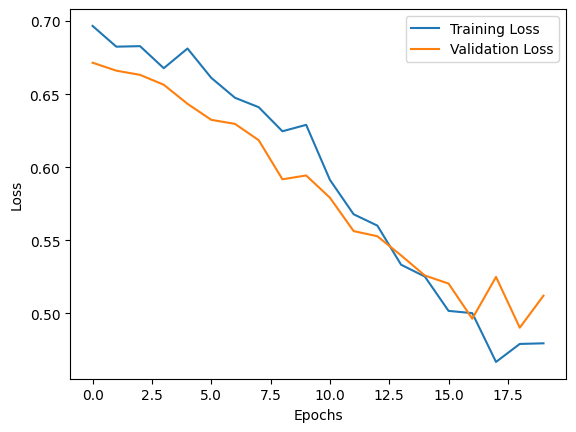

In [ ]:
# initialize and train the model without dropout
model_with_dropout = SimpleNNWithDropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.001)

train_losses_without_dropout, val_losses_without_dropout, val_accuracies_without_dropout = train_model(
  model_with_dropout, train_loader, test_loader, criterion, optimizer, num_epochs=20
)

# Plot training and validation Loss and accuracy (without dropout)
plt.plot(train_losses_without_dropout, label='Training Loss')
plt.plot(val_losses_without_dropout, label='Validation Loss')
# plt.plot(val_accuracies_without_dropout, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()